<a href="https://colab.research.google.com/github/abhy-kumar/chess_stuff/blob/main/Chess.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from IPython import get_ipython
from IPython.display import display, Image
# %%
!pip install chess
# %%
!pip install stockfish python-chess
!sudo apt install stockfish
!pip install python-chess cairosvg

# %%
!pip install stockfish python-chess

import chess
import chess.engine
from stockfish import Stockfish
import os
# Import the svg submodule
import chess.svg
import cairosvg
from io import BytesIO

Enter Stockfish level (1-20): 1


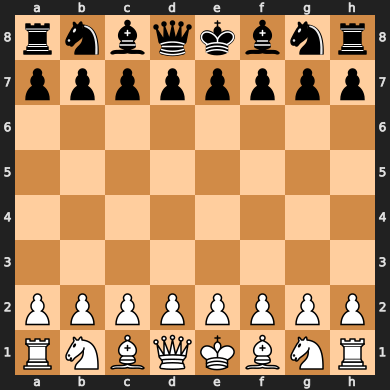

White's turn
Enter your move (e.g., e2e4 or e4): e4


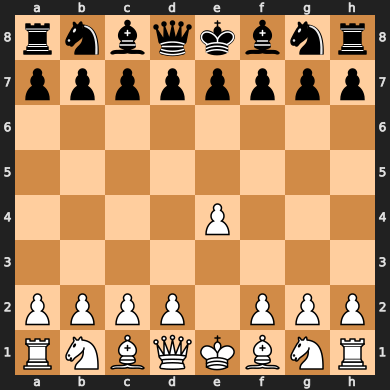

Black (AI) is thinking...


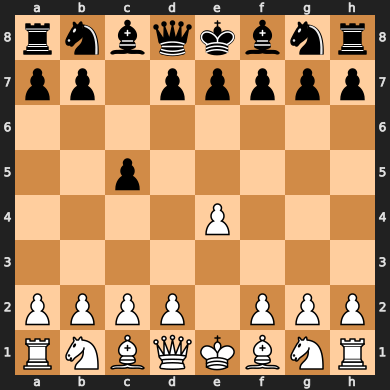

White's turn
Enter your move (e.g., e2e4 or e4): Nf3


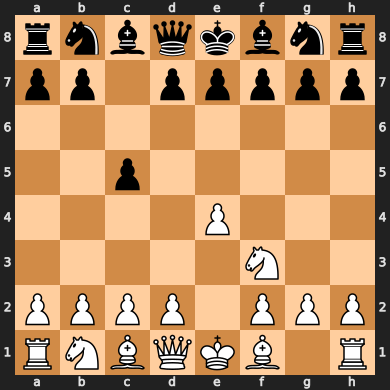

Black (AI) is thinking...


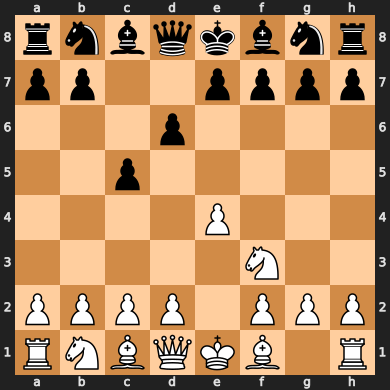

White's turn


KeyboardInterrupt: Interrupted by user

In [ ]:
# Try to find the stockfish executable in common locations
possible_paths = ["/usr/games/stockfish", "/usr/local/bin/stockfish", "stockfish"]
stockfish_path = None
for path in possible_paths:
    if os.path.exists(path):
        stockfish_path = path
        break

# If no path is found, let the Stockfish library try to find it
if stockfish_path:
    stockfish = Stockfish(path=stockfish_path)
else:
    stockfish = Stockfish()

def print_board(board):
    svg = chess.svg.board(board=board)
    png = cairosvg.svg2png(bytestring=svg.encode('utf-8'))
    display(Image(data=png, format='png'))

def get_player_move():
    move = input("Enter your move (e.g., e2e4 or e4): ").strip()
    return move

def get_ai_move(board, level):
    # Set the board position in Stockfish
    stockfish.set_fen_position(board.fen())

    # Set Stockfish level
    stockfish.set_skill_level(level)

    # Get the best move suggested by Stockfish
    best_move = stockfish.get_best_move()
    return chess.Move.from_uci(best_move)

def play_chess():
    board = chess.Board()

    level = int(input("Enter Stockfish level (1-20): "))

    while not board.is_game_over():
        print_board(board)

        if board.turn:
            print("White's turn")
            move = get_player_move()
            if move == "undo":
                undo_move(board)
                continue
        else:
            print("Black (AI) is thinking...")
            move = get_ai_move(board, level)

        try:
            if board.turn:
                board.push_san(move)
            else:
                board.push(move)
        except ValueError:
            print("Invalid move. Please try again.")

    print_board(board)
    result = board.result()
    print(f"Game over: {result}")

def undo_move(board):
    if len(board.move_stack) > 0:
        board.pop()
    else:
        print("No moves to undo")

if __name__ == "__main__":
    play_chess()
e4